##### Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import precision_recall_curve


In [2]:
df = pd.read_csv("brain_stroke.csv")

In [3]:
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [5]:
print(df.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000  


In [6]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


##### Data Preprocessing

In [8]:
df = pd.get_dummies(df, columns=['gender', 'smoking_status'])

In [9]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [10]:
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}

In [11]:
df['work_type'] = df['work_type'].map(work_type_mapping)

In [12]:
residence_type_mapping = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(residence_type_mapping)

In [13]:
correlation_matrix = df.corr()

In [14]:
positive_corr_columns = correlation_matrix[correlation_matrix['stroke'] > 0].index.tolist()
print("Columns with positive correlation to 'stroke':", positive_corr_columns)

Columns with positive correlation to 'stroke': ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'smoking_status_formerly smoked', 'smoking_status_smokes']


In [15]:
negative_corr_columns = correlation_matrix[correlation_matrix['stroke'] < 0].index.tolist()
print("Columns with negative correlation to 'stroke':", negative_corr_columns)

Columns with negative correlation to 'stroke': ['work_type', 'Residence_type', 'gender_Female', 'smoking_status_Unknown', 'smoking_status_never smoked']


##### Model Training

In [16]:
df_stroke_1 = df[df['stroke'] == 1]
df_stroke_0 = df[df['stroke'] == 0].sample(n=1000, random_state=12)

In [17]:
df_balanced = pd.concat([df_stroke_0, df_stroke_1])

In [18]:
unwanted_features = ['age', 'ever_married', 'gender_Female', 'gender_Male', 'Residence_type','work_type']

In [19]:
existing_unwanted_features = [feature for feature in unwanted_features if feature in df_balanced.columns]

In [20]:
X = df_balanced.drop(['stroke'] + unwanted_features, axis=1)

In [21]:
y = df_balanced['stroke']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [95]:
model = DecisionTreeClassifier(random_state=10, max_depth=10, class_weight='balanced')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=10)

In [96]:
y_pred = model.predict(X_test)

In [97]:
y_probs = model.predict_proba(X_test)[:, 1]

In [98]:
threshold = 0.3
y_pred_adjusted = (y_probs > threshold).astype(int)

In [99]:
df.drop(unwanted_features + negative_corr_columns, axis=1, inplace=True)

In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Adjusted Classification Report:\n", classification_report(y_test, y_pred_adjusted, zero_division=1))

Accuracy: 0.692
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71       200
           1       0.28      0.60      0.38        50

    accuracy                           0.61       250
   macro avg       0.57      0.60      0.55       250
weighted avg       0.74      0.61      0.65       250



In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[150  50]
 [ 27  23]]


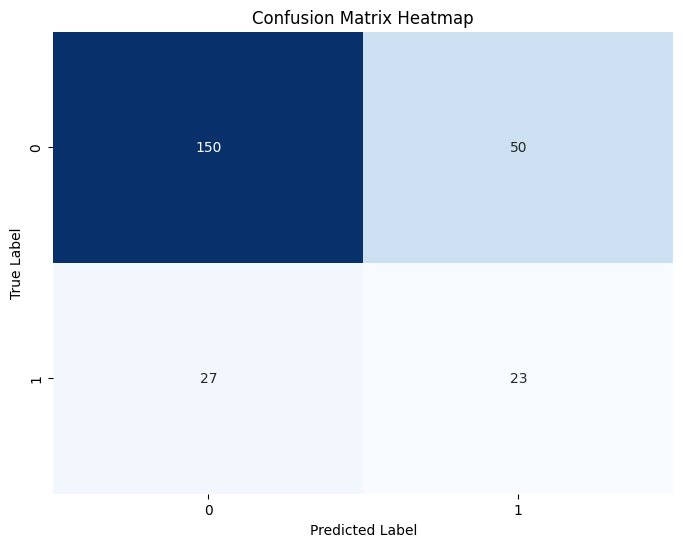

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

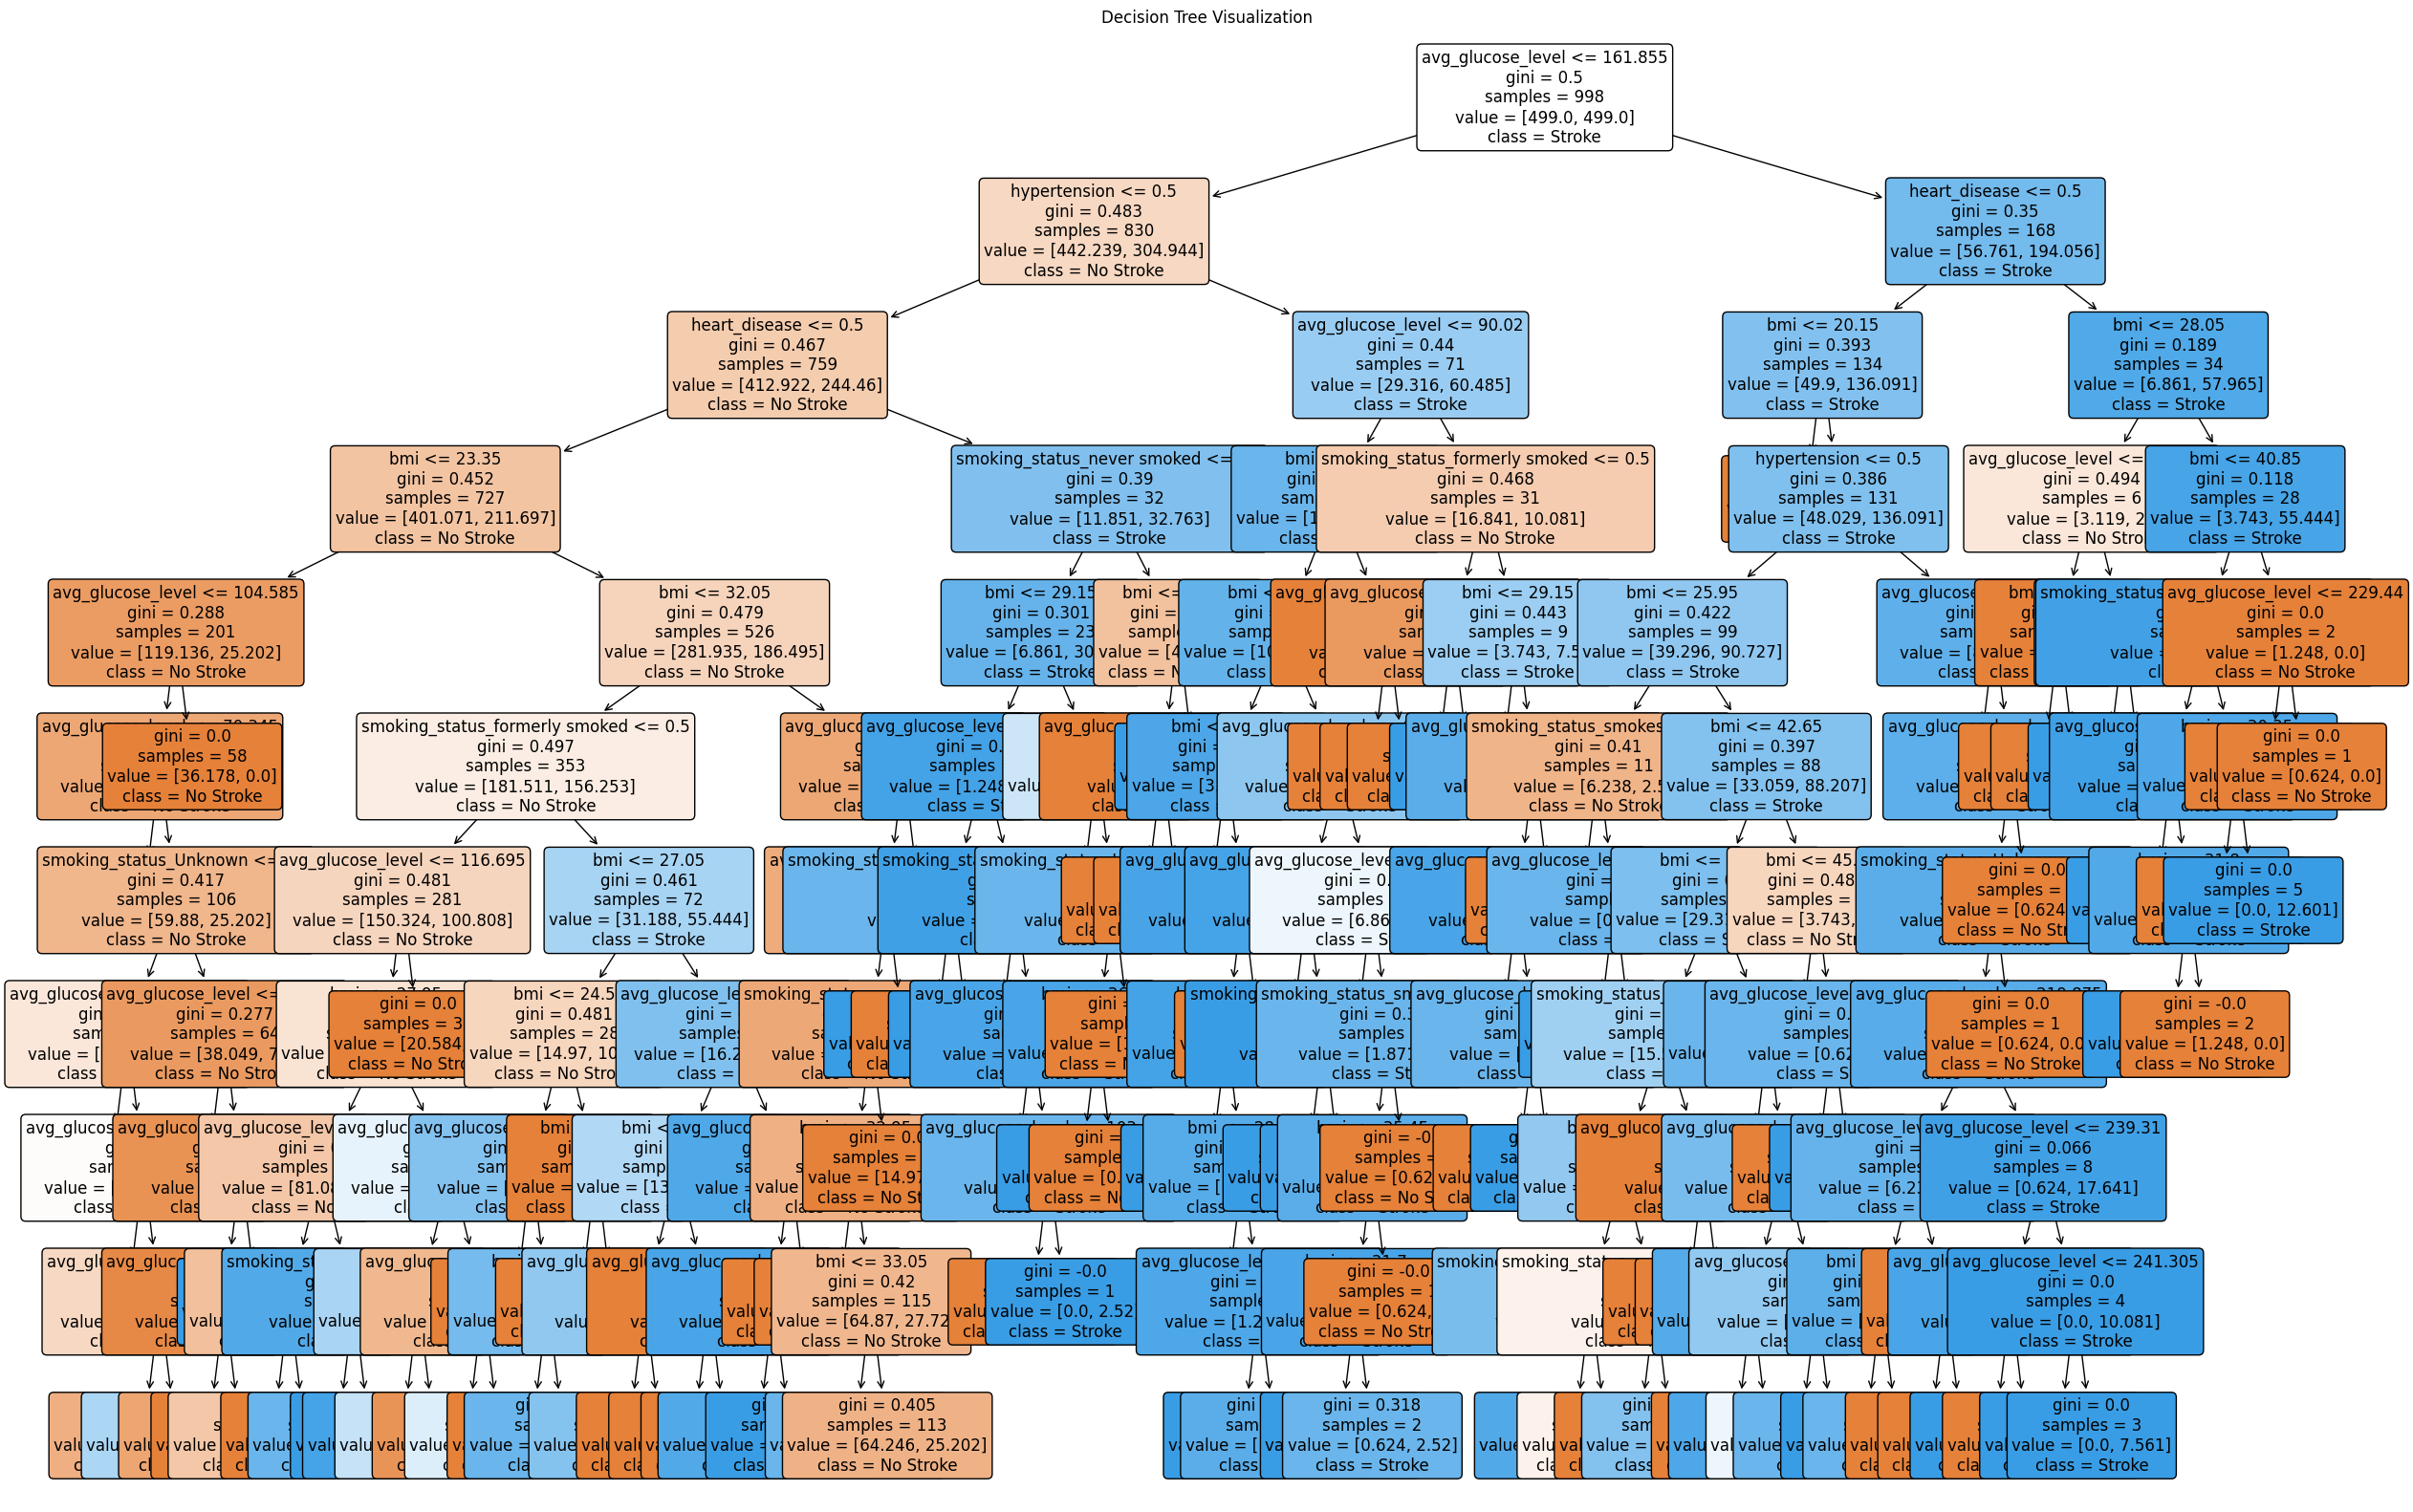

In [31]:
plt.figure(figsize=(30, 20))
plot_tree(model, feature_names=list(X.columns), class_names=['No Stroke', 'Stroke'], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()

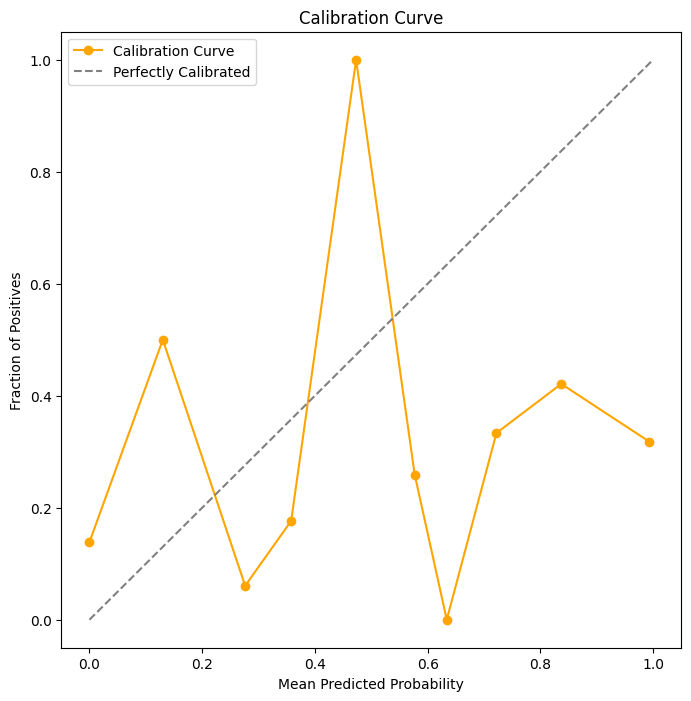

In [32]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='orange', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

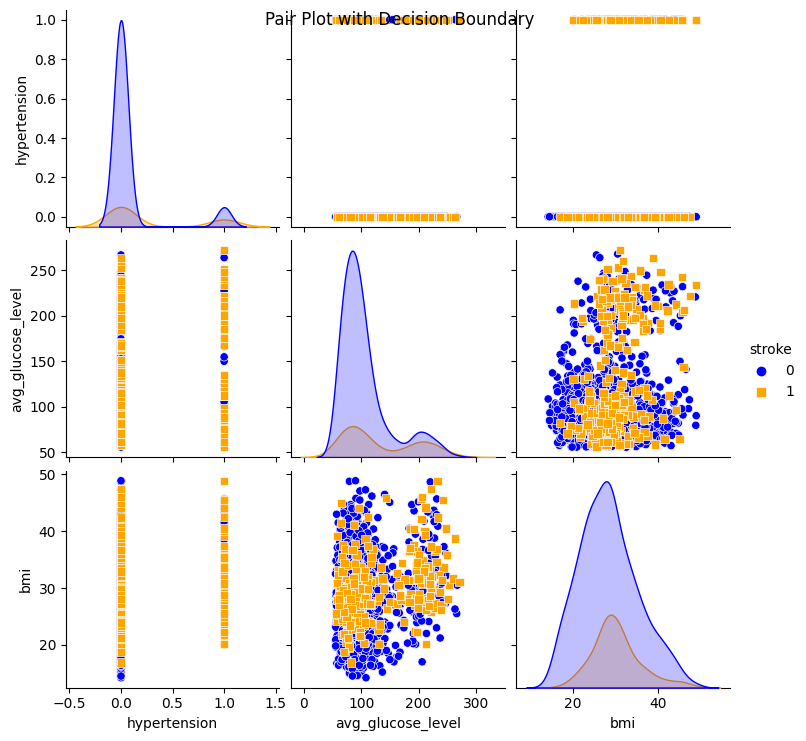

In [33]:
subset_features = ['hypertension', 'avg_glucose_level', 'bmi']

subset_df = pd.concat([X[subset_features], y], axis=1)

sns.pairplot(subset_df, hue='stroke', markers=['o', 's'], palette={0: 'blue', 1: 'orange'})
plt.suptitle('Pair Plot with Decision Boundary')
plt.show()


In [105]:

features = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                      'smoking_status_Unknown', 'smoking_status_formerly smoked',
                      'smoking_status_never smoked', 'smoking_status_smokes']

data_test = pd.DataFrame({
    'hypertension': [0],
    'heart_disease': [1],
    'avg_glucose_level': [150],
    'bmi': [25],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [1],
    'smoking_status_never smoked': [0],
    'smoking_status_smokes': [0]
})

data_test = data_test[features]

prediction = model.predict(data_test)

if prediction[0] == 1:
    print("Orang ini kemungkinan memiliki stroke.")
else:
    print("Orang ini kemungkinan tidak memiliki stroke.")


Orang ini kemungkinan memiliki stroke.


In [106]:

features = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                      'smoking_status_Unknown', 'smoking_status_formerly smoked',
                      'smoking_status_never smoked', 'smoking_status_smokes']

data_test = pd.DataFrame({
    'hypertension': [1],
    'heart_disease': [0],
    'avg_glucose_level': [50],
    'bmi': [30],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [0],
    'smoking_status_smokes': [1]
})

data_test = data_test[features]

prediction = model.predict(data_test)

if prediction[0] == 1:
    print("Orang ini kemungkinan memiliki stroke.")
else:
    print("Orang ini kemungkinan tidak memiliki stroke.")


Orang ini kemungkinan tidak memiliki stroke.


In [107]:

features = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                      'smoking_status_Unknown', 'smoking_status_formerly smoked',
                      'smoking_status_never smoked', 'smoking_status_smokes']

data_test = pd.DataFrame({
    'hypertension': [1],
    'heart_disease': [0],
    'avg_glucose_level': [200],
    'bmi': [50],
    'smoking_status_Unknown': [0],
    'smoking_status_formerly smoked': [0],
    'smoking_status_never smoked': [1],
    'smoking_status_smokes': [0]
})

data_test = data_test[features]

prediction = model.predict(data_test)

if prediction[0] == 1:
    print("Orang ini kemungkinan memiliki stroke.")
else:
    print("Orang ini kemungkinan tidak memiliki stroke.")


Orang ini kemungkinan memiliki stroke.
